In [1]:
#Citation:

# @misc{gym-PVDER,
# title = {{gym-SolarPVDER-environment}: A environment for solar photovoltaic distributed energy resources},
# author = "{Siby Jose Plathottam}",
# howpublished = {\url{https://github.com/sibyjackgrove/gym-SolarPVDER-environment}},
# url = "https://github.com/sibyjackgrove/gym-SolarPVDER-environment",
# year = 2019,
# note = "[Online; accessed 18-March-2019]"}

In [2]:
import gym
import gym_PVDER
import numpy as np
import random
from IPython.display import clear_output
import time

In [4]:
#import tensorflow as tf

# Defining Random and Deep Q-Learning Agents

In [5]:
class Agent():
    def __init__(self, env):
        self.action_size = env.action_space.n
        print("Action size:", self.action_size)

        
    def get_action(self, state):
        action = random.choice(range(self.action_size))
        
        return action

In [6]:
class QNAgent(Agent):
    def __init__(self, env, discount_rate=0.97, learning_rate=0.01):
        super().__init__(env)
        self.state_size = 11 #env.observation_space.shape #env.observation_space.n
        print("State size:", self.state_size)
        
        self.eps = 1.0
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        self.build_model()
        
        self.sess = tf.Session()
        self.sess.run(tf.global_variables_initializer())
        
    def build_model(self):
        tf.reset_default_graph()
        self.state_in = tf.placeholder(tf.int32, shape=[None,None])
        self.action_in = tf.placeholder(tf.int32, shape=[1])
        self.target_in = tf.placeholder(tf.float32, shape=[1])
        
        self.state = tf.one_hot(self.state_in, depth=self.state_size)
        self.action = tf.one_hot(self.action_in, depth=self.action_size)
        
        self.q_state = tf.layers.dense(self.state, units=self.action_size, name="q_table")
        self.q_action = tf.reduce_sum(tf.multiply(self.q_state, self.action), axis=1)
        
        self.loss = tf.reduce_sum(tf.square(self.target_in - self.q_action))
        self.optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        
    def get_action(self, state):
        q_state = self.sess.run(self.q_state, feed_dict={self.state_in: [state]})
        action_greedy = np.argmax(q_state)
        action_random = super().get_action(state)
        return action_random if random.random() < self.eps else action_greedy
    
    def train(self, experience):
        state, action, next_state, reward, done = ([exp] for exp in experience)
        
        q_next = self.sess.run(self.q_state, feed_dict={self.state_in: next_state})
        print("1q_next: {}".format(q_next))
        q_next[done] = np.zeros([self.action_size])
        print("2q_next: {}".format(q_next))
        print("done: {}".format(done))
        q_target = reward + self.discount_rate * np.max(q_next)
        
        feed = {self.state_in: state, self.action_in: action, self.target_in: q_target}
        self.sess.run(self.optimizer, feed_dict=feed)
        
        if experience[4]:
            self.eps = self.eps * 0.99
            
    def __del__(self):
        self.sess.close()

# Random Agent - Training

ma:0.93+0.03j, ia:119.58+3.20j, Vdc:548.90, vta:255.51+7.95j, va:255.31+6.81j, Ppv:45747.58, S_inverter:45869.00+200.43j, S_PCC:45828.13-1.85j, Q_ref:0.00, Vdc_ref:549.10, tStart:40.00, 
Reward:-0.00005
Time for step:0.068


d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


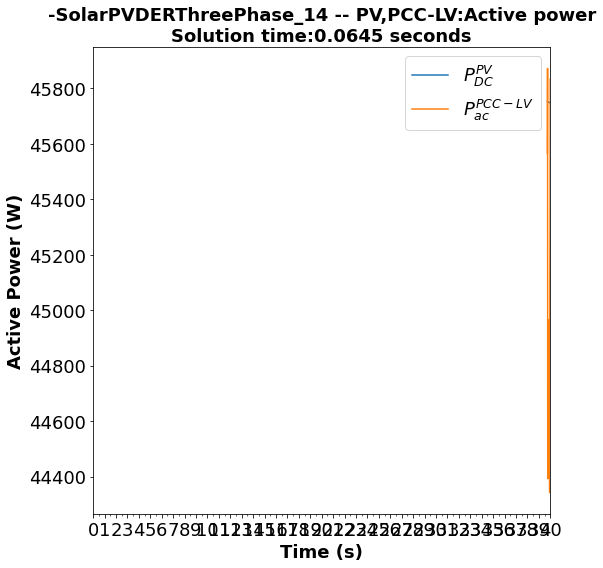

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


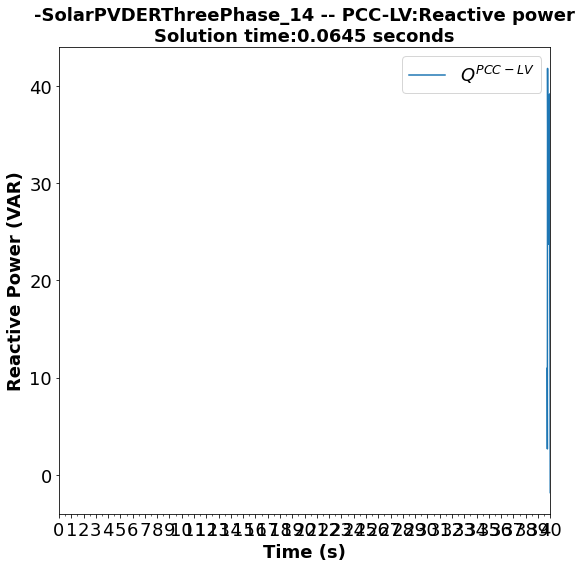

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


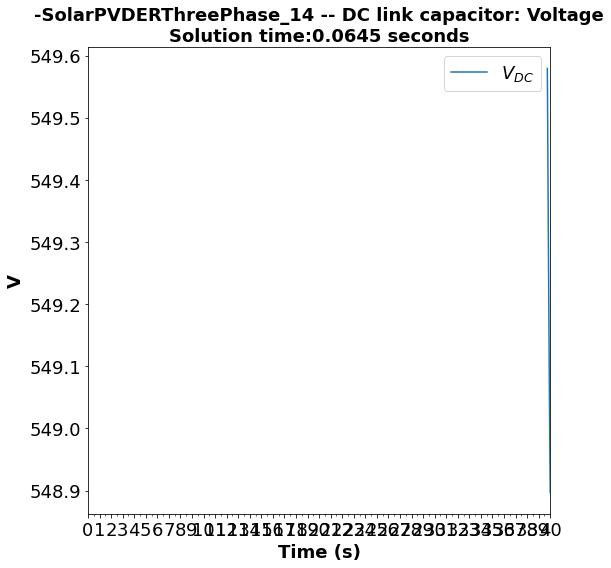

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


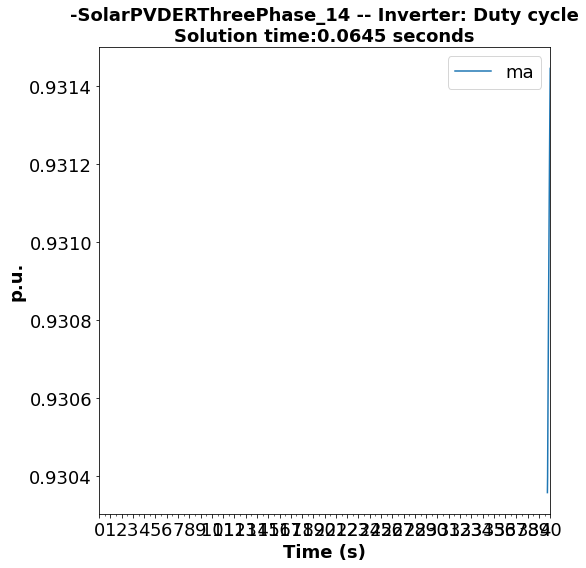

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


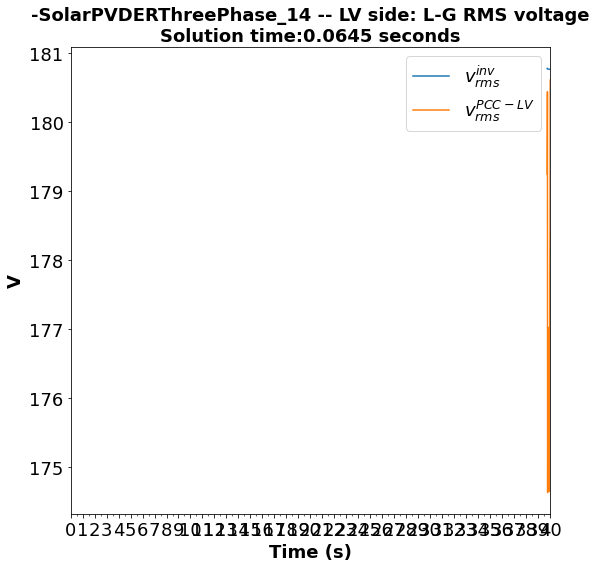

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


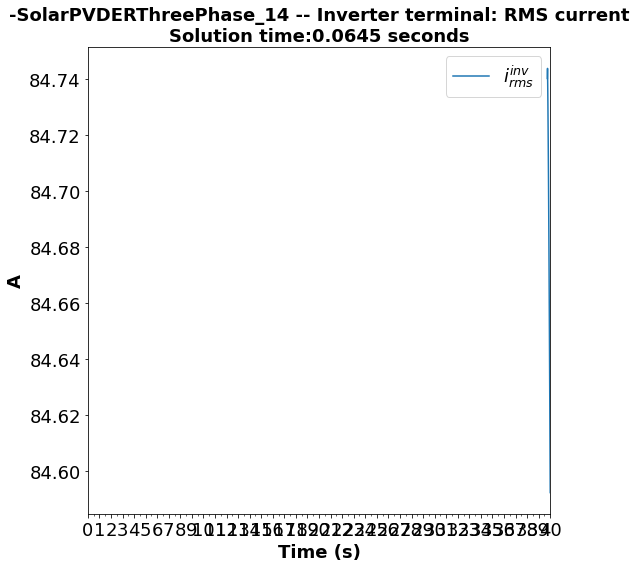

total_reward: -0.012864057977676273


In [8]:
env = gym.make('PVDER-v0',DISCRETE_REWARD=False, goals_list=['voltage_regulation'])

random_agent = Agent(env)
total_reward = 0
observations = []
for ep in range(5):
    #state = env.reset()[0]
    state = env.reset()
    done = False
    while not done:
        action = random_agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        observations.append(next_state)
        #agent.train((state,action,next_state[0],reward,done))
        #random_agent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        print("s:", state, "a:", action)
        print("Episode: {}, Total reward: {}".format(ep,total_reward))
        #env.render(mode='vector')
        #with tf.variable_scope("q_table", reuse=True):
        #    weights = agent.sess.run(tf.get_variable("kernel"))
            #print(weights)
        time.sleep(0.05)
        clear_output(wait=True)
    env.render(mode='human')
    #print(state)

    
#env.show_env_config()
#env.show_goal_config()
#env.show_sim_config()
len(observations)
print("total_reward: {}".format(total_reward))
vaR_rnd = [o[2] for o in observations]

# Deep Q-Learning Agent - Training

ma:0.89+0.03j, ia:123.72+3.55j, Vdc:550.22, vta:245.94+8.22j, va:245.73+7.05j, Ppv:45755.99, S_inverter:45687.29+216.41j, S_PCC:45640.82-0.16j, Q_ref:0.00, Vdc_ref:550.30, tStart:40.00, 
Reward:-0.00004
Time for step:0.066


d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


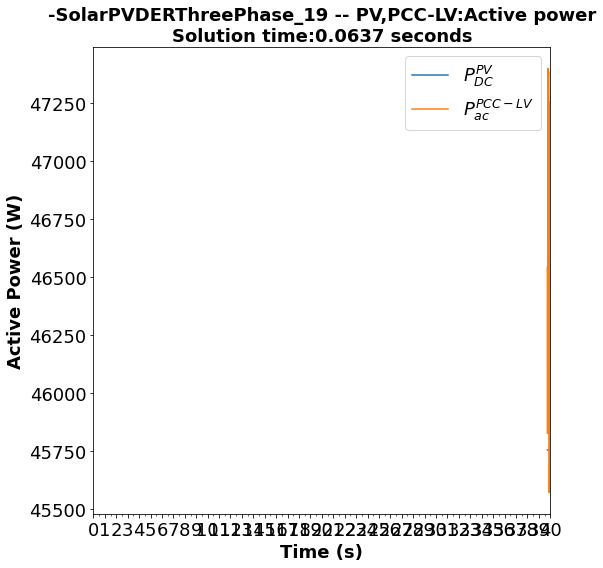

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


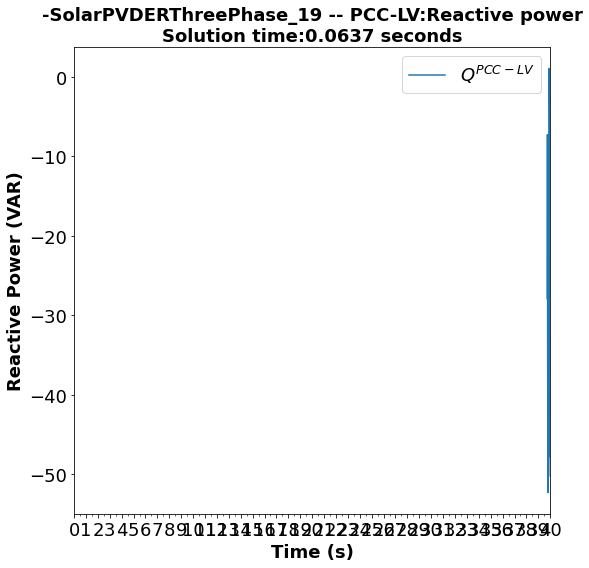

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


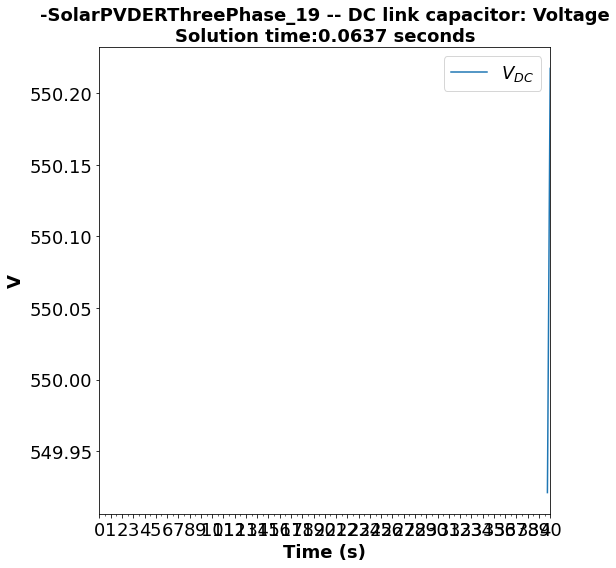

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


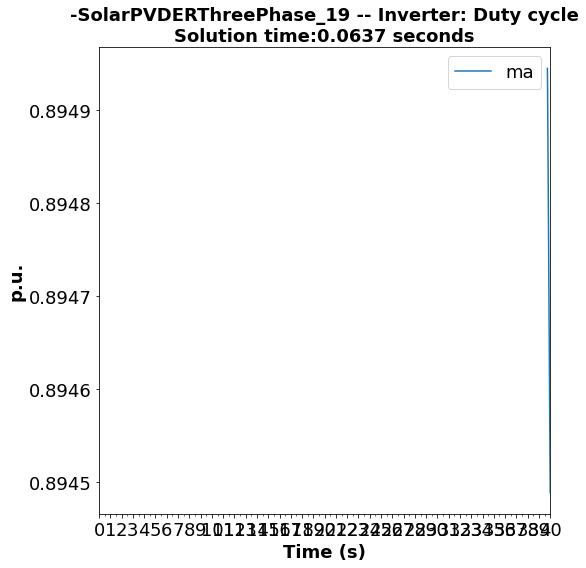

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


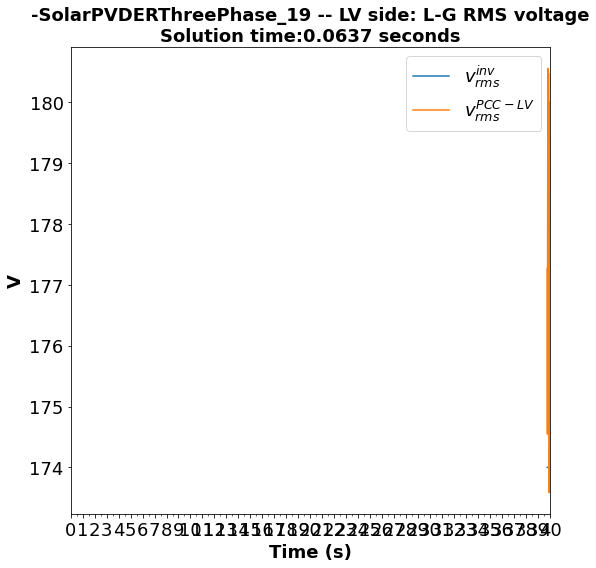

d:\documents\ms application\reinforcement learning\pvder-test\solarpv-der-simulation-utility\pvder\simulation_utilities.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


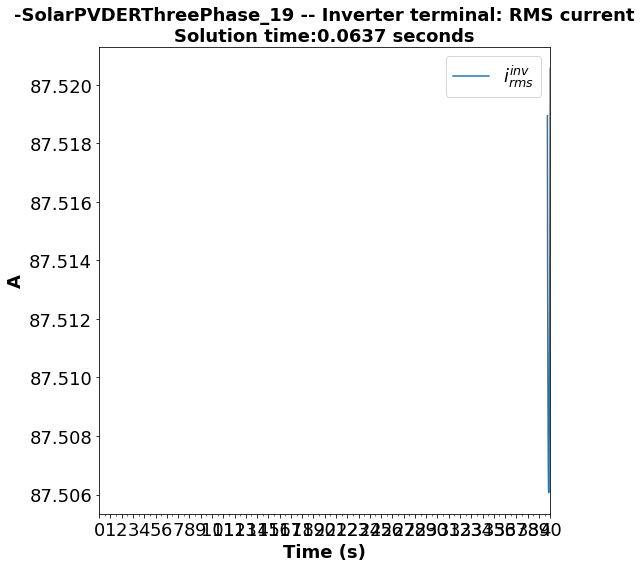

total_reward: -0.013782649396347471


In [9]:
env = gym.make('PVDER-v0',DISCRETE_REWARD=False, goals_list=['voltage_regulation'])

qn_agent = QNAgent(env)
total_reward = 0
observations = []
for ep in range(5):
    #state = env.reset()[0]
    state = env.reset()
    done = False
    while not done:
        action = qn_agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        observations.append(next_state)
        #agent.train((state,action,next_state[0],reward,done))
        qn_agent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        print("s:", state, "a:", action)
        print("Episode: {}, Total reward: {}, eps: {}".format(ep,total_reward,qn_agent.eps))
        #env.render(mode='vector')
        #with tf.variable_scope("q_table", reuse=True):
        #    weights = agent.sess.run(tf.get_variable("kernel"))
            #print(weights)
        time.sleep(0.05)
        clear_output(wait=True)
    env.render(mode='human')
    #print(state)
    
#env.show_env_config()
#env.show_goal_config()
#env.show_sim_config()
len(observations)
print("total_reward: {}".format(total_reward))
vaR_dqn = [o[2] for o in observations]

<AxesSubplot:>

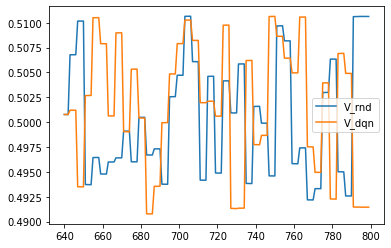

In [21]:
import pandas as pd
df = pd.DataFrame(columns=['V_rnd','V_dqn'])
df['V_rnd'] = vaR_rnd
df['V_dqn'] = vaR_dqn

df.iloc[-160:].plot()

In [20]:
print(np.var(df['V_rnd'][-160:]))
print(np.var(df['V_dqn'][-160:]))

3.4571526746555884e-05
4.02410133546993e-05
